# Day 20: Movement


## Configuration

In [1]:
import os
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Desired styling for matplotlib
from matplotlib import cycler
colors = cycler('color',["44aa98","ab4498","332389","86ccec","ddcc76","cd6477","882255", "117732"])
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['text.color'] = '212121'
plt.rcParams['xtick.color'] = '212121'
plt.rcParams['ytick.color'] = '212121'
plt.rcParams['font.family'] = 'sans serif'
plt.rcParams['axes.facecolor'] = 'None'
plt.rcParams['axes.edgecolor'] = 'dimgray'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'None'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'
plt.rc('axes', prop_cycle=colors)

# Camp Fire Survivors - Relocation Map

This data was curated by David Forsynth. See the original map at [Camp Fire Survivors - Relocation Map](https://drive.google.com/open?id=1rCyXTAiGYiQFrMdhGt0SwYHxsS1RDSop&usp=sharing).

In [3]:
# Map to data
data_file = "camp-fire-survivor-relocation.csv"
data_path = os.path.join("..", "data", "etc", "camp-fire-reloc", data_file)

# Read data
data = pd.read_csv(data_path)

# Preview
data.head(5)

,X,Y,Full Name,City,State,Zip Code,County,Manually adjusted?
0,-85.250489,31.571835,"Abbeville, AL",Abbeville,AL,36310,HENRY,0
1,-87.683597,30.406587,"Foley, AL",Foley,AL,36535,BALDWIN,0
2,-86.586104,34.730369,"Huntsville, AL",Huntsville,AL,35801,MADISON,0
3,-87.436080,30.414248,"Lillian, AL",Lillian,AL,36549,BALDWIN,0
4,-149.112778,61.599722,"Palmer, AK",Palmer,AK,99645,MATANUSKA SUSITNA,0


In [4]:
# Find location of Paradise
idx = data.City == "Paradise"
paradise = data[idx]

# Reduce full data set
data_red = data[~idx]

# Preview
paradise

,X,Y,Full Name,City,State,Zip Code,County,Manually adjusted?
123,-121.621918,39.759606,"Paradise, CA",Paradise,CA,95967,BUTTE,0


# Construct map
Using `Basemap` to create the plot

In [5]:
# Choose region of interest - Continental US
llcrnrlat = 25
llcrnrlon = -125
urcrnrlat = 50
urcrnrlon = -65

# Determine center point for projection
mid_lon = (urcrnrlon+llcrnrlon)/2.0
mid_lat = (urcrnrlat+llcrnrlat)/2.0

In [6]:
# Utility function - adjusted from 
# https://stackoverflow.com/questions/55854988/subplots-onto-a-basemap/55890475#55890475
def build_bar(mx, my, ax, xvals, yvals, width, fcolors):
    # Construct inset axes
    ax_h = inset_axes(ax,
                      width=width, 
                      height=width, 
                      loc='center',
                      bbox_to_anchor=(mx, my),
                      bbox_transform=ax.transData, 
                      borderpad=0,
                      axes_kwargs={'alpha': 0.35, 'visible': True})
    # Plot bars
    for x,y,c in zip(xvals, yvals, fcolors):
        ax_h.bar(x, y, label=str(x), fc=c)
    # Turn off axis
    ax_h.axis('off')
    return ax_h

skipping Palmer, AK for plotting purposes
skipping Oahu, HI for plotting purposes
skipping Waikiki, HI for plotting purposes


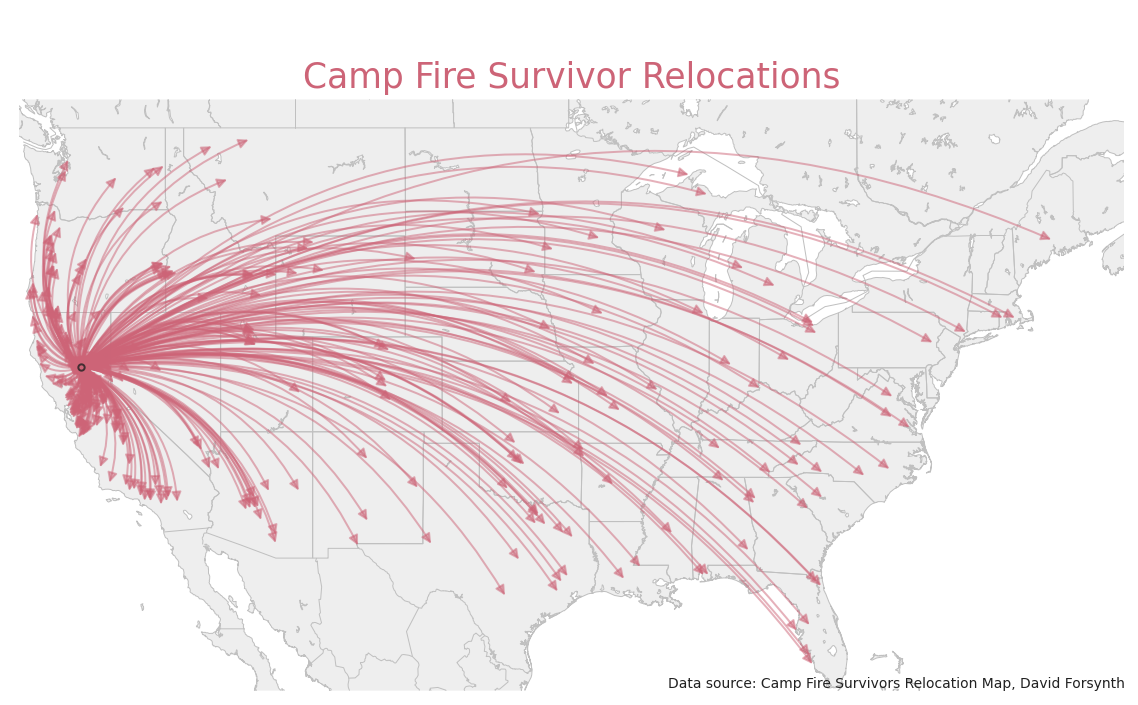

In [7]:
# Construct plot
fig, ax = plt.subplots(figsize=(8,6))

# Create basemap
m = Basemap(
            llcrnrlat=llcrnrlat,
            llcrnrlon=llcrnrlon,
            urcrnrlat=urcrnrlat,
            urcrnrlon=urcrnrlon,
            ax=ax,
            resolution='i',
            projection='merc',
            lon_0=mid_lon,
            lat_0=mid_lat
    )

# Style continent and coastlines
m.fillcontinents(color='#eeeeee', lake_color="w", zorder=0)
m.drawcountries(color="silver", linewidth=0.5, zorder=1)
m.drawcoastlines(color='silver', linewidth=0.5, zorder=1)
m.drawstates(color='silver', linewidth=0.5, zorder=1)

# Paradise location
x_paradise, y_paradise = m(paradise.X, paradise.Y)

# Add arrows for each relocation destination
for i, row in data_red.iterrows():
    if row.State not in ['AK', 'HI']:
        x, y = m(row.X, row.Y)
        ax.annotate('',
                     xy=(x_paradise, y_paradise), xycoords='data',
                     xytext=(x, y), textcoords='data',
                     arrowprops=dict(
                         connectionstyle='arc3,rad=0.3',
                         arrowstyle='<|-',
                         color='C5',
                         alpha=0.5
                     )
                )
    else:
        print(f"skipping {row.City}, {row.State} for plotting purposes")

# Add marker to signify location of Paradise
ax.scatter(x_paradise, y_paradise,
           color='C5',
           alpha=0.8,
           edgecolor="#212121",
           marker='o',
           s=10,
           zorder=10
          )

# Turn off axis
ax.axis('off')

# Credit sources
ax.annotate("Data source: Camp Fire Survivors Relocation Map, David Forsynth",
            xy=(1,0), xycoords='axes fraction',
            fontsize="x-small", ha="right", va="bottom",
           )

# Set title
ax.set_title("Camp Fire Survivor Relocations",
             fontsize="xx-large", color="C5")

# Save plot
out_file = "20_Movement.png"
out_path = os.path.join("..", "contributions", out_file)
plt.tight_layout()
fig.savefig(out_path, dpi=300, facecolor="w", bbox_inches="tight")

# Preview
plt.show()